<a href="https://colab.research.google.com/github/Cristiand056/Estadisticas-y-Machine-Learning-G8---ONE/blob/main/optimizacion_aeroportuaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import pandas as pd

datos = pd.read_csv('/content/flights.csv')
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [126]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [127]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [128]:
datos.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


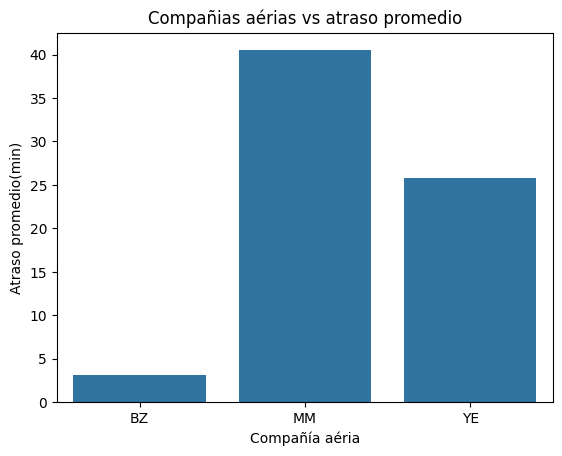

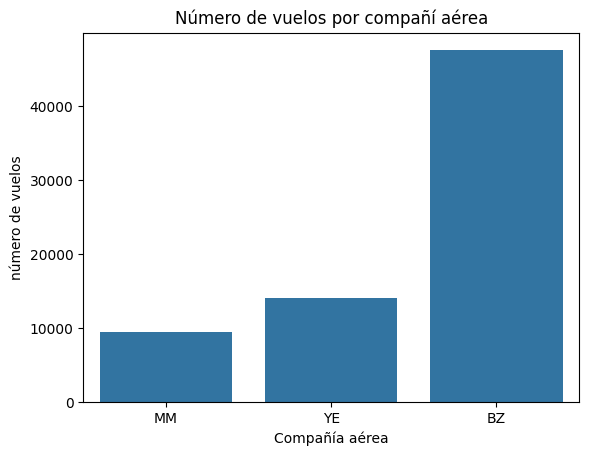

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_delay = datos.groupby('airline')['delay'].mean().reset_index()

sns.barplot(data=avg_delay, x='airline', y='delay')
plt.title('Compañias aérias vs atraso promedio')
plt.xlabel('Compañía aéria')
plt.ylabel('Atraso promedio(min)')
plt.show()

sns.countplot(data=datos, x='airline')
plt.title('Número de vuelos por compañí aérea')
plt.xlabel('Compañía aérea')
plt.ylabel('número de vuelos')
plt.show()

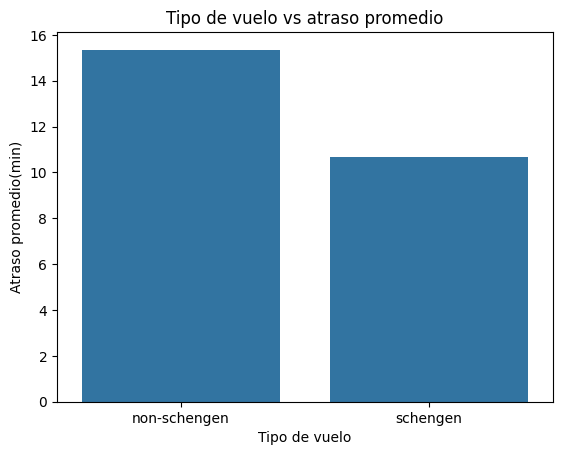

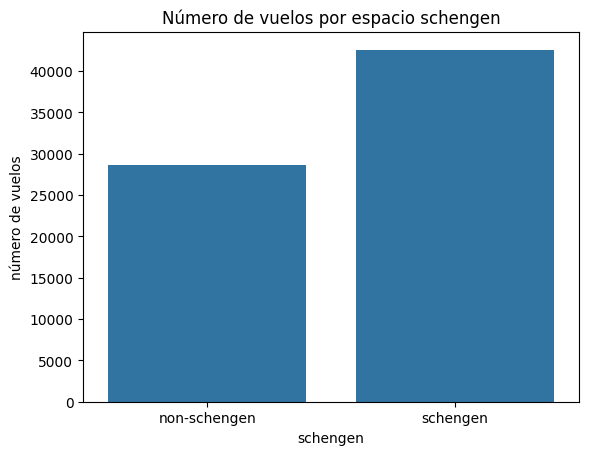

In [130]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()

sns.barplot(data=avg_delay, x='schengen', y='delay')
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio(min)')
plt.show()

sns.countplot(data=datos, x='schengen')
plt.title('Número de vuelos por espacio schengen')
plt.xlabel('schengen')
plt.ylabel('número de vuelos')
plt.show()

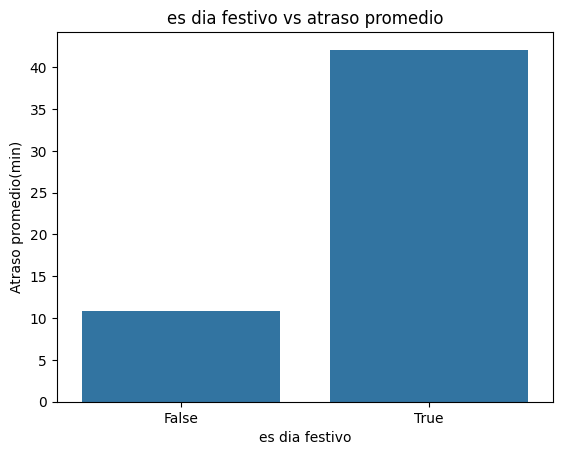

In [131]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()

sns.barplot(data=avg_delay, x='is_holiday', y='delay')
plt.title('es dia festivo vs atraso promedio')
plt.xlabel('es dia festivo')
plt.ylabel('Atraso promedio(min)')
plt.show()

In [132]:
datos['aircraft_type'].value_counts()#.index
#Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175','Boeing 737', 'Boeing 777

,count
aircraft_type,
Airbus A320,30778
Airbus A330,16654
Boeing 787,9606
Embraer E175,7098
Boeing 737,4722
Boeing 777,2317


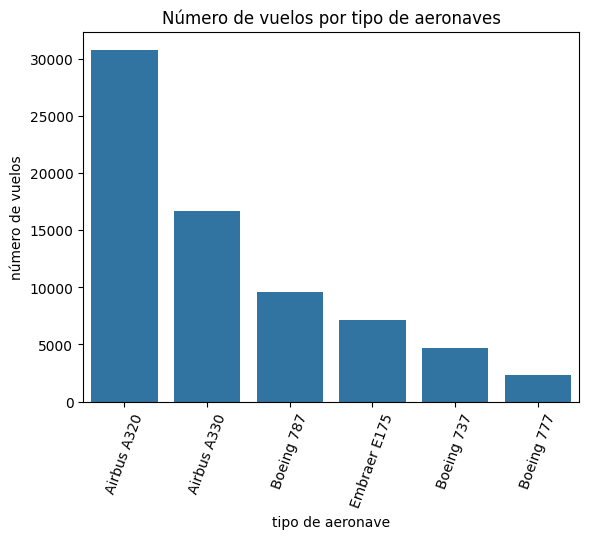

In [133]:
order = datos['aircraft_type'].value_counts().index

sns.countplot(data=datos, x='aircraft_type', order=order)
plt.title('Número de vuelos por tipo de aeronaves')
plt.xticks(rotation=70)
plt.xlabel('tipo de aeronave')
plt.ylabel('número de vuelos')
plt.show()

<Axes: xlabel='arrival_time', ylabel='Count'>

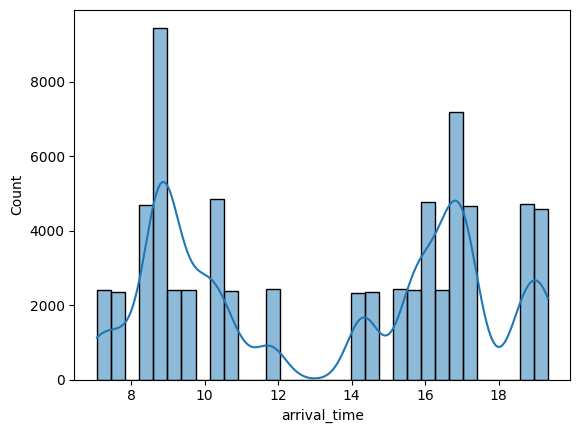

In [134]:
sns.histplot(data=datos, x='arrival_time', kde=True)

https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

In [135]:
import numpy as np

def calcular_ancho_bin(df, columna):
    Q75, Q25 = np.percentile(df[columna], [75, 25])
    IQR = Q75 - Q25
    ancho_bin = 2 * IQR * np.power(len(df[columna]), -1/3)
    return ancho_bin

0.3846176245547029


<Axes: xlabel='arrival_time', ylabel='Count'>

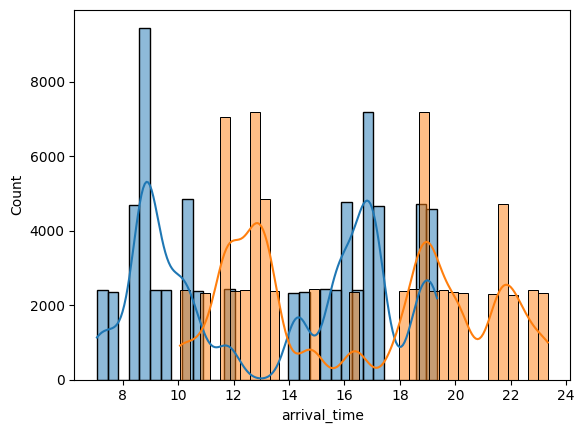

In [136]:
ancho_bin_at = calcular_ancho_bin(datos, 'arrival_time')
print(ancho_bin_at)
ancho_bin_dt = calcular_ancho_bin(datos, 'departure_time')
sns.histplot(data=datos, x='arrival_time', kde=True, binwidth=ancho_bin_at)
sns.histplot(data=datos, x='departure_time', kde=True, binwidth=ancho_bin_dt)

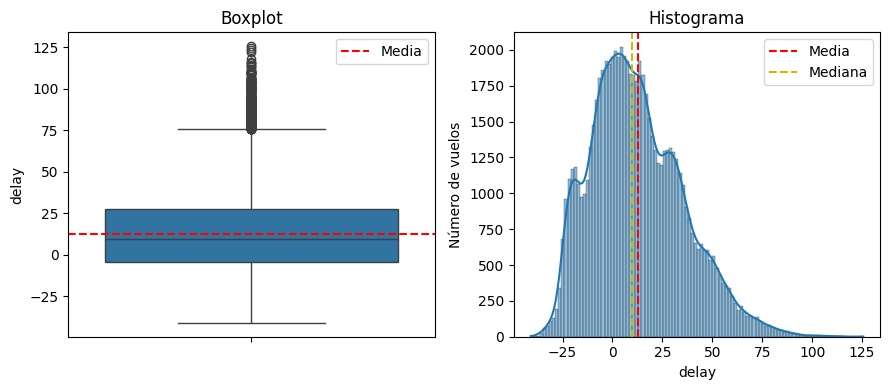

In [137]:
media_retraso = datos['delay'].mean()
mediana_retraso = datos['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=datos, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=media_retraso, color='r', linestyle='--', label='Media')
axes[0].legend()

ancho_bin_delay = calcular_ancho_bin(datos, 'delay')
sns.histplot(data=datos, x='delay', ax=axes[1], kde=True, binwidth=ancho_bin_delay)
plt.ylabel('Número de vuelos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=media_retraso, color='r', linestyle='--', label='Media')
axes[1].axvline(x=mediana_retraso, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

#Clase 2

In [138]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [139]:
#datos.drop(columns='datos', axis=1, inplace=True)

In [140]:
datos['date'] = datos['year'].astype(str)+'-'+(datos['day']+1).astype(str)
datos['date'] = pd.to_datetime(datos['date'], format='%Y-%j')
datos.head(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01


In [141]:
datos['is_weekend'] = datos['date'].dt.weekday.isin([5,6])
datos['day_name'] = datos['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
23565,9,BZ,Airbus A330,non-schengen,TZF,10.733469,12.733469,111,2014,True,17.142992,2014-04-22,False,Tuesday
65409,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,345,2021,False,-26.474614,2021-12-12,True,Sunday
7465,23,YE,Embraer E175,schengen,TCY,18.801235,21.801235,132,2011,False,21.208733,2011-05-13,False,Friday
16062,8,BZ,Airbus A320,schengen,ZQO,15.729617,18.729617,340,2012,False,-1.354567,2012-12-06,False,Thursday
65254,14,BZ,Airbus A330,schengen,ZQO,7.708301,11.708301,335,2021,False,-0.999726,2021-12-02,False,Thursday


In [142]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [143]:
import warnings

warnings.filterwarnings('ignore')

In [144]:
datos['schengen'] = datos['schengen'].replace({'non-schengen':0, 'schengen': 1})
datos['is_weekend'] = datos['is_weekend'].replace({False:0, True: 1})
datos['is_holiday'] = datos['is_holiday'].replace({False:0, True: 1})
datos.sample(3)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
25899,25,BZ,Boeing 777,0,CSF,19.341235,23.341235,266,2014,0,26.359031,2014-09-24,0,Wednesday
10898,13,BZ,Boeing 787,0,TCY,10.172731,13.172731,361,2011,0,-15.014083,2011-12-28,0,Wednesday
7282,17,BZ,Airbus A330,0,CNU,16.718722,21.718722,120,2011,0,-4.658004,2011-05-01,1,Sunday


In [145]:
categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

pd.get_dummies(data=datos, columns=categoricas, dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [146]:
datos_codificados = pd.get_dummies(data=datos, columns=categoricas, dtype=int)
datos_codificados.sample(3)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
3599,2,1,19.196804,22.196804,239,2010,0,-7.191979,2010-08-28,1,...,0,0,1,0,0,1,0,0,0,0
7079,29,1,8.591208,11.591208,106,2011,0,7.646756,2011-04-17,1,...,0,0,1,0,0,0,1,0,0,0
52643,19,1,16.245220,19.245220,224,2019,0,69.736312,2019-08-13,0,...,0,1,0,0,0,0,0,0,1,0


In [147]:
datos[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [148]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

In [149]:
df = datos_codificados.drop(columns=['flight_id','departure_time', 'year', 'day', 'date' ])
df.sample(10)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
49935,1,8.923441,0,-0.243418,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16865,0,10.733469,0,-23.902629,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
39327,1,18.635384,0,-13.571233,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
16927,0,17.041281,0,36.483913,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9524,1,9.344097,0,-0.198961,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
43585,1,19.196804,0,9.298202,1,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
402,1,18.801235,0,-4.093955,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
52191,1,8.564949,0,17.831581,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6435,0,15.967963,0,-16.192137,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
19524,1,16.909690,0,24.225552,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [150]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categoricas = ['airline','aircraft_type','origin','day_name']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore', drop='if_binary'),
    categoricas),
    remainder='passthrough', force_int_remainder_cols=False)

datos_one_hot = one_hot_enc.fit_transform(datos)
datos_one_hot = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())
datos_one_hot

,onehotencoder__airline_BZ,onehotencoder__airline_MM,onehotencoder__airline_YE,onehotencoder__aircraft_type_Airbus A320,onehotencoder__aircraft_type_Airbus A330,onehotencoder__aircraft_type_Boeing 737,onehotencoder__aircraft_type_Boeing 777,onehotencoder__aircraft_type_Boeing 787,onehotencoder__aircraft_type_Embraer E175,onehotencoder__origin_AUZ,...,remainder__flight_id,remainder__schengen,remainder__arrival_time,remainder__departure_time,remainder__day,remainder__year,remainder__is_holiday,remainder__delay,remainder__date,remainder__is_weekend
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Clase 3

In [151]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay',
       'date', 'is_weekend', 'day_name'],
      dtype='object')

In [156]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

X = df.drop(columns='delay', axis=1)
y = df['delay']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

baseline = DummyRegressor()
baseline.fit(X_train, y_train)

DummyRegressor()

In [157]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

y_pred_dummy = baseline.predict(X_test)

def calcular_regresion(y_test,y_pred):
  rmse = mean_squared_error(y_test,y_pred)
  mae= mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  metricas = {
      'RMSE':round(rmse**(1/2),4),
      'MAE': round(mae,4),
      'R2': round(r2,4)
  }
  return metricas

In [158]:
resultados_baseline = calcular_regresion(y_test, y_pred_dummy)
resultados_baseline

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

##Extra3

In [161]:
def calcular_metricas_regresion(y_test, y_pred):

    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metricas = {
        'Raíz del Error Cuadrático Medio':round(rmse**(1/2),4),
        'Error Absoluto Medio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas
estrategias = ["mean", "median", ("quantile", 0.25), ("constant", 10.0)]

resultados = {}

for estrategia in estrategias:
    if isinstance(estrategia, tuple):
        estrategia, valor = estrategia
        if estrategia == "quantile":
            model_dummy = DummyRegressor(strategy=estrategia, quantile=valor)
        else:
            model_dummy = DummyRegressor(strategy=estrategia, constant=valor)
    else:
        model_dummy = DummyRegressor(strategy=estrategia)

    model_dummy.fit(X_train, y_train)

    y_pred_dummy = model_dummy.predict(X_test)

    metricas = calcular_metricas_regresion(y_test, y_pred_dummy)

    resultados[estrategia] = metricas

for estrategia, metricas in resultados.items():
    print(f"Estrategia: {estrategia}")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor}")
    print("\n")

Estrategia: mean
Raíz del Error Cuadrático Medio: 23.1612
Error Absoluto Medio: 18.5646
R2 Score: -0.0


Estrategia: median
Raíz del Error Cuadrático Medio: 23.3446
Error Absoluto Medio: 18.4452
R2 Score: -0.0159


Estrategia: quantile
Raíz del Error Cuadrático Medio: 28.7554
Error Absoluto Medio: 22.0248
R2 Score: -0.5414


Estrategia: constant
Raíz del Error Cuadrático Medio: 23.3079
Error Absoluto Medio: 18.4449
R2 Score: -0.0127




In [162]:
from sklearn.ensemble import RandomForestRegressor

modelo = RandomForestRegressor(max_depth=5, random_state=42)
modelo.fit(X_train,y_train)
ypred = modelo.predict(X_test)
resultados_rf = calcular_regresion(y_test,ypred)
resultados_rf

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

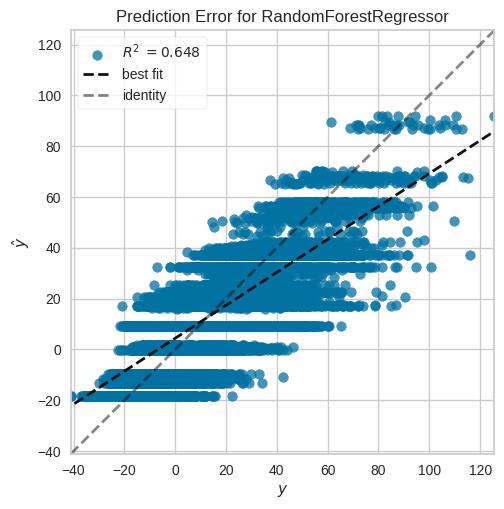

In [163]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(modelo, X_train, y_train, X_test, y_test);

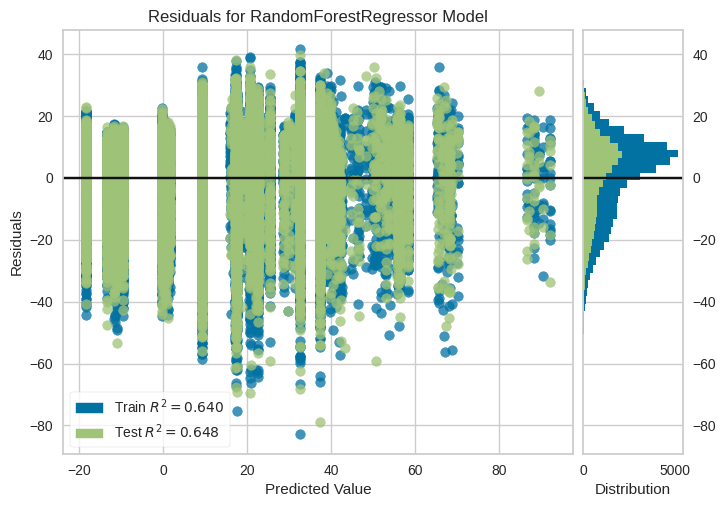

In [164]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(modelo, X_train, y_train, X_test, y_test);

In [165]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'RMSE':'neg_root_mean_squared_error',
    'MAE':'neg_mean_absolute_error',
    'R2':'r2'
}

cv = KFold(n_splits=5,shuffle=True, random_state=42)
cv_results = cross_validate(modelo, X_train, y_train, scoring=scoring, cv=cv)
cv_results

{'fit_time': array([5.96632552, 3.07597947, 3.05934644, 4.14144373, 3.09496045]),
 'score_time': array([0.05540872, 0.05870557, 0.05527711, 0.0559938 , 0.05987787]),
 'test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_MAE': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}

#Clase 4

In [166]:
len(df.columns)

31

In [168]:
importances = modelo.feature_importances_
importances

array([3.39814918e-06, 3.60417588e-02, 1.45895991e-01, 6.10861947e-05,
       5.30319673e-01, 1.36989042e-05, 2.14417900e-05, 1.00746574e-01,
       5.76173558e-02, 5.18974843e-04, 8.83162236e-05, 2.64390542e-02,
       4.58830752e-02, 1.01922847e-04, 1.71891675e-04, 1.59736760e-02,
       3.57450957e-05, 9.21269997e-05, 5.42552087e-04, 1.03212932e-02,
       2.09099647e-02, 6.63707069e-03, 2.64070312e-04, 8.68597522e-04,
       1.00052465e-04, 2.79146627e-05, 7.17673254e-05, 3.72705034e-05,
       1.06499638e-04, 8.71862374e-05])

In [173]:
feature_importances = pd.DataFrame({'Features': X.columns, 'Importances': (importances * 100).round(2)}).sort_values(by='Importances', ascending=False)
feature_importances

,Features,Importances
4,airline_BZ,53.03
2,is_holiday,14.59
7,aircraft_type_Airbus A320,10.07
8,aircraft_type_Airbus A330,5.76
12,aircraft_type_Embraer E175,4.59
1,arrival_time,3.60
11,aircraft_type_Boeing 787,2.64
20,origin_TCY,2.09
15,origin_CSF,1.60
19,origin_PUA,1.03


In [174]:
resultados = pd.DataFrame(index=['RMSE','MAE','R2'])
model_features = RandomForestRegressor(max_depth=5,random_state=42)
ct_features = [i if i != 0 else 1 for i in range(0,35,5)]

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_test[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = calcular_regresion(y_test,y_pred)
  resultados[i] = list(metricas.values())

resultados

,1,5,10,15,20,25,30
RMSE,18.8331,15.1564,13.7587,13.7497,13.7498,13.7477,13.7479
MAE,14.9620,12.0605,11.0422,11.0285,11.0280,11.0261,11.0262
R2,0.3388,0.5718,0.6471,0.6476,0.6476,0.6477,0.6477


In [175]:
resultados = pd.DataFrame(index=['RMSE','MAE','R2'])
model_features = RandomForestRegressor(max_depth=5,random_state=42)
ct_features = range(10,16)

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_test[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = calcular_regresion(y_test,y_pred)
  resultados[i] = list(metricas.values())

resultados

,10,11,12,13,14,15
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476


In [176]:
selected_features = feature_importances['Features'].values[:13]
X_selected_features = X[selected_features]
X_selected_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_PUA,origin_TZF,day_name_Friday,origin_MWL
0,0,0,1,0,0,8.885071,0,1,0,0,0,1,0
1,0,0,1,0,0,8.939996,0,1,0,0,0,1,0
2,1,0,0,0,1,18.635384,0,0,0,0,1,1,0
3,1,0,0,1,0,15.967963,0,0,0,0,0,1,0
4,1,0,0,1,0,16.571894,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384,0,0,0,0,1,0,0
71171,1,1,0,1,0,16.718722,0,0,0,0,0,0,0
71172,0,1,0,0,0,8.564949,1,0,0,0,1,0,0
71173,1,1,1,0,0,9.344097,0,0,0,0,0,0,0


In [177]:
X_train,X_test,y_train,y_test = train_test_split(X_selected_features,y,random_state=42)

In [178]:
param_grid = {
              'max_depth':[5,10,15],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[2,4,6],
              'n_estimators':[100,150,200]
             }

In [179]:
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits=5, shuffle=True, random_state=42)
model_grid = GridSearchCV(RandomForestRegressor(random_state=42),
                          param_grid=param_grid, scoring='r2',
                          cv=cv)

model_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [180]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [181]:
y_pred_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_regresion(y_test,y_pred_grid)
metricas_model_grid

{'RMSE': 13.2308, 'MAE': 10.6296, 'R2': 0.6754}

In [182]:
resultados['modelo_grid'] = list(metricas_model_grid.values())
resultados

,10,11,12,13,14,15,modelo_grid
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497,13.2308
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285,10.6296
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476,0.6754


In [183]:
import pickle

try:
  with open('champion.pkl','wb') as file:
    pickle.dump(model_grid.best_estimator_,file)
  print('Modelo serializado con éxito')
except Exception as e:
  print('Se presentó un error al almacenar el modelo: ',str(e))

Modelo serializado con éxito


#Extra 4

In [186]:
nueva_muestra = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [184]:
file_path = '/content/champion.pkl'

try:
    with open(file_path, 'rb') as file:
        model_p = pickle.load(file)
    print("¡Modelo cargado con éxito!")
except Exception as e:
    print("Ocurrió un error al cargar el modelo:", str(e))

¡Modelo cargado con éxito!


In [187]:
# Ejemplo de predicción con datos de entrada 'X'
model_p.predict([nueva_muestra])[0]

np.float64(48.73321005358915)